## Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

## Loading packages

In [2]:
train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')

## Data at first sight

Here is an excerpt of the the data description for the competition:

* Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
* Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
* Features without these designations are either continuous or ordinal.
* Values of -1 indicate that the feature was missing from the observation.
* The target columns signifies whether or not a claim was filed for that policy holder.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


we indeed see the following
* binary variables
* categorical variables of which the category values are integers (정수 카테고리형 변수)
* other variables with integer or float values
* variables with -1 representing missing values
* the target variable and an ID variable

In [5]:
train.shape

(595212, 59)

In [6]:
train.drop_duplicates()
train.shape
# 중복된 열이 있는지 확인했지만 shape를 보니 59512로 동일한것으로 보아 없다.

(595212, 59)

In [7]:
test.shape
# target: 공지 때렸는지 안때렸는지만 없

(892816, 58)

## 더미 변수(추가)
머신러닝 알고리즘에 따라서 범주형 변수를 바로 학습 못하는 알고리즘이 있다. 그래서 그런 변수들은 더미 변수를 생성해줘야 한다. 더미 밸류란 범주형 변수들을 하나씩 풀어 이진 변수를 만들어주는 것을 말한다.

예를 들어 가족형태가 single, small, big 3개 level 이였는데 어떤 알고리즘은 이것을 인식하지 못하므로 각각의 family sized.single, family sized.small, family sized,big 열을 만들어 0 또는 1을 할당하여 이진 변수로 분할 해준다.

여기선 bin variable은 이미 이진 밸류여서 패스, 14개의 cat 밸류를 더미밸류로 만들어줄 수 있다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Metadata
To faciliate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling, ..
* role: input, ID, target
* level: nominal, interval, ordinal, binary
* keep: True or False
* dtype: int, float, str

In [9]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [10]:
data = [] 
for f in train.columns:
    # Definng the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
        
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname' : f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [11]:
data

[{'varname': 'id',
  'role': 'id',
  'level': 'nominal',
  'keep': False,
  'dtype': dtype('int64')},
 {'varname': 'target',
  'role': 'target',
  'level': 'binary',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_01',
  'role': 'input',
  'level': 'ordinal',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_02_cat',
  'role': 'input',
  'level': 'nominal',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_03',
  'role': 'input',
  'level': 'ordinal',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_04_cat',
  'role': 'input',
  'level': 'nominal',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_05_cat',
  'role': 'input',
  'level': 'nominal',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_06_bin',
  'role': 'input',
  'level': 'binary',
  'keep': True,
  'dtype': dtype('int64')},
 {'varname': 'ps_ind_07_bin',
  'role': 'input',
  'level': 'binary',
  'keep': True,
  'dtype': dtype('int64

In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [13]:
# Example to extract all nominal variables that are not dropped
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [14]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics
생성해둔 메타데이터로 기술(설명) 통계 구하기 수월하
### Interval variables

In [15]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### reg variables
* only ps_reg_03 has '-1' missing values
* min ~ max 범위가 다른데 이부분은 이용할 분류기에 라 스케일링(standardscaler)이 필요

### car variables
* ps_car_12 & ps_car_14 모두 -1 missing values
* 마찬가지 min ~ max 범위가 달라 스케일링 필요

### calc variables
* no -1(missing values)
* 최댓값이 0.9fh qhdla
* 세개 값 모두 비슷한 분포를 보임

전체적으로 등간 변수의 범위가 다소 작은데, 데이터의 익명화를 위해 변환(log 등)이 이미 적용되었을 수도 있다.
## Ordinal variables

In [16]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* only ps_car_11 -1(missing values)
* 마찬가지 스케일링 적용 필요

## Binary variables

In [17]:
v = meta[(meta.level=='binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* train set에서 target의 평균은 3.645%로 아주 불균형한 데이터 세트로 보인다
* 평균값은 대부분 0의 값을 가지고 있을것으로 예상 가능

## Handling imbalanced classes
앞에서 말한 것처럼 target=1인 비율이 0인 비율보다 현저히 적다. 이를 통해 정확도는 높지만 실제로는 부가가치가 있는 모델로 이어질 수 있습니다. 두 가능한 전략은 이렇다.
* oversampling records with target =1 
* undersampling records with target = 0
우리는 많은 training set을 갖고 있으므로 undersampling을 실행할 것이다.

언더 샘플링은 너무 많은 정상 레이블 데이터를 감소시켜 정상 레이블의 경우 오히려 제대로 된 학습을 할 수 없다는 단점이 있어 잘 적용하지 않지만 여기선 언더 샘플링을 적용한다. 

In [18]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target =0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersampling: 195246


## Data Quality checks

* checking missing values
Missings are represented as -1

In [19]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* ps_car_03, ps_car_05 변수는 결측값 비율이 높기때문에 제거해야 한다.
* 다른 categorical 변수들을 위해 결측값을 -1로 남겨둔다.
* ps_reg_03(continuous)는 18% 결측값을 가지므로 평균값으로 대체한다.
* ps_car_11(ordinal)은 1개의 결측값을 가지므로 최빈값으로 대체한다.
* ps_car_14(continuous)는 7% 결측값을 가지므로 평균값으로 대체한다.

In [20]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)

# Updating the meta
meta.loc[(vars_to_drop), 'keep'] = False 

# Imputing with the mean or mode (평균, 최빈값으로 대체 )
mean_imp = SimpleImputer(missing_values = -1, strategy='mean')
mode_imp = SimpleImputer(missing_values = -1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()


### Checking the cardinality of the categorical variables
카테고리형 변수로 더미 변수를 생성하기 전에 각 카테고리 변수에 몇 개의 값들이 있는지 알아보자.

In [21]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


ps_car_11_cat 만 많은 값을 가지고 있다. / oliver 이 작성한 방식을 채택하겠다.

In [22]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                  tst_series = None,
                  target = None,
                  min_samples_leaf=1,
                  smoothing = 1,
                  noise_level = 0):
    """
    trn_series : training categoricl feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    # assert : 가정설정문, 어떤 조건을 테스트하는 디버깅 보조 도구
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    
    # Smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # 모든 target에 평균 적용
    prior = target.mean()
    
    # count가 클수록 full_avg가 적게 고려된다.
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # trn, tst series에 평균 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge index를 유지하지 않으므로 저장
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge index를 유지하지 않으므로 저장
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
    

In [23]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                            test["ps_car_11_cat"],
                            target=train.target,
                            min_samples_leaf=100,
                            smoothing=10,
                            noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False # update the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis =1, inplace=True)

## Exploratory Data Visualization

### categorical variables
카테고리 변수들과 target=1인 변수들을 보자

<Figure size 640x480 with 0 Axes>

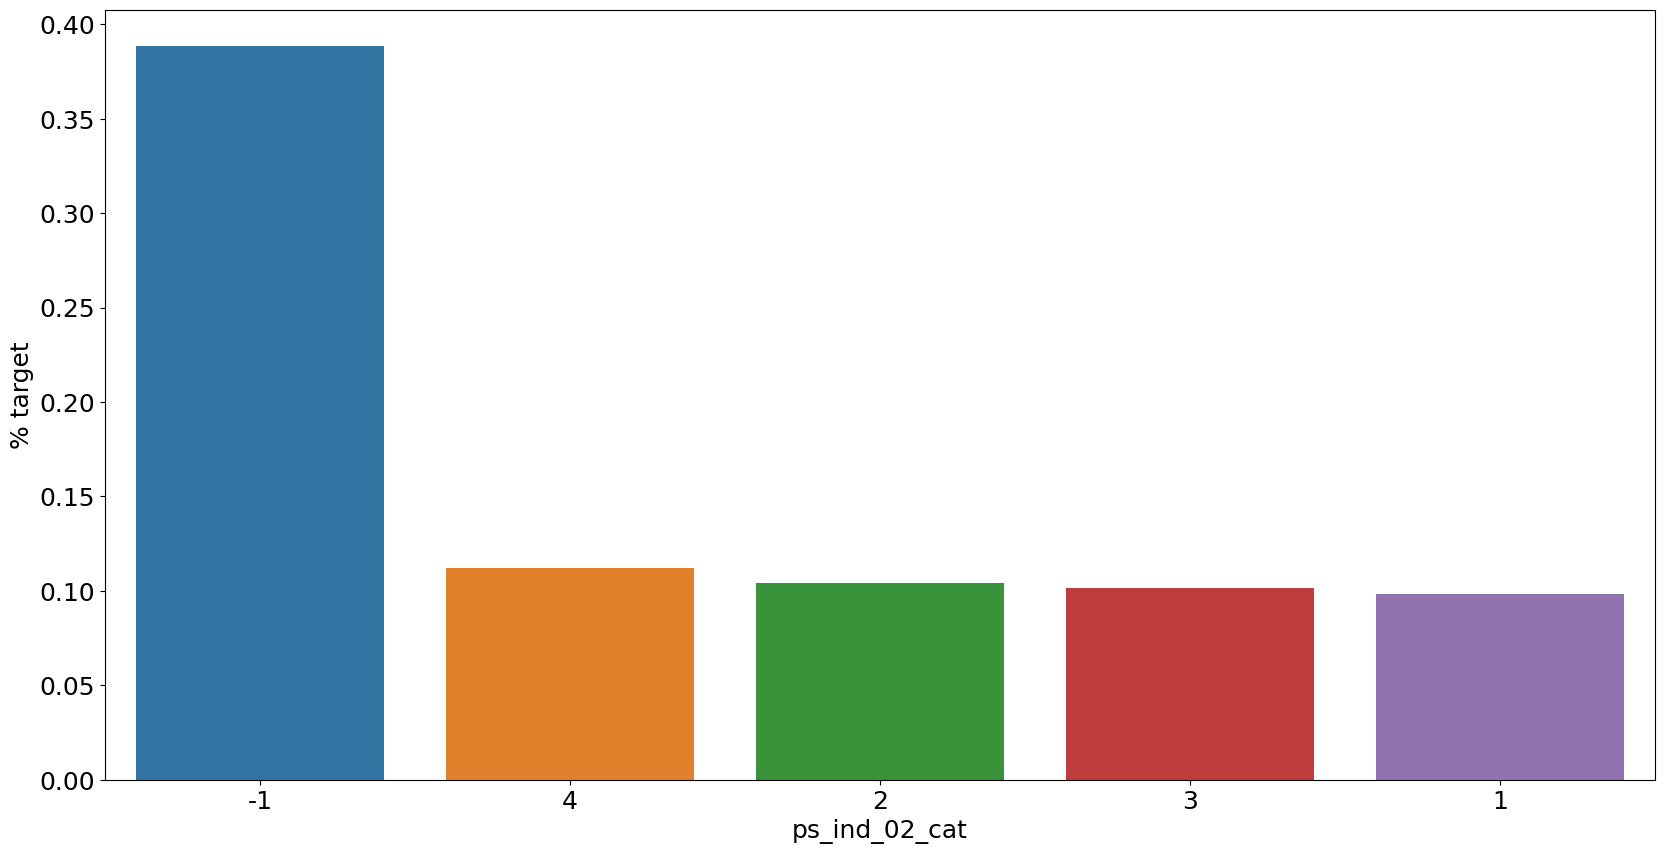

<Figure size 640x480 with 0 Axes>

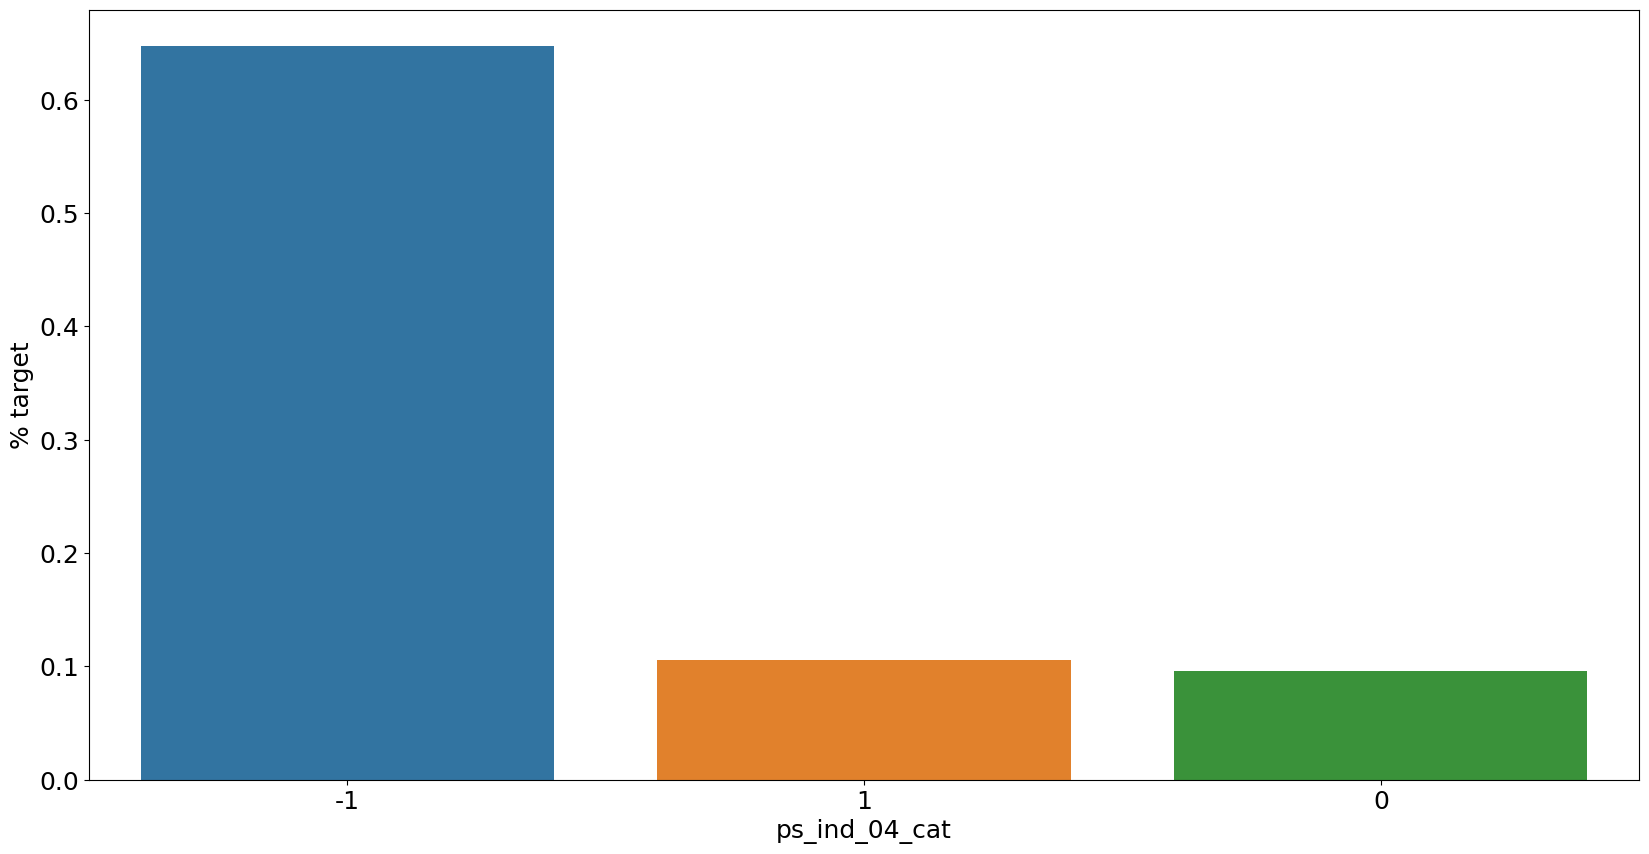

<Figure size 640x480 with 0 Axes>

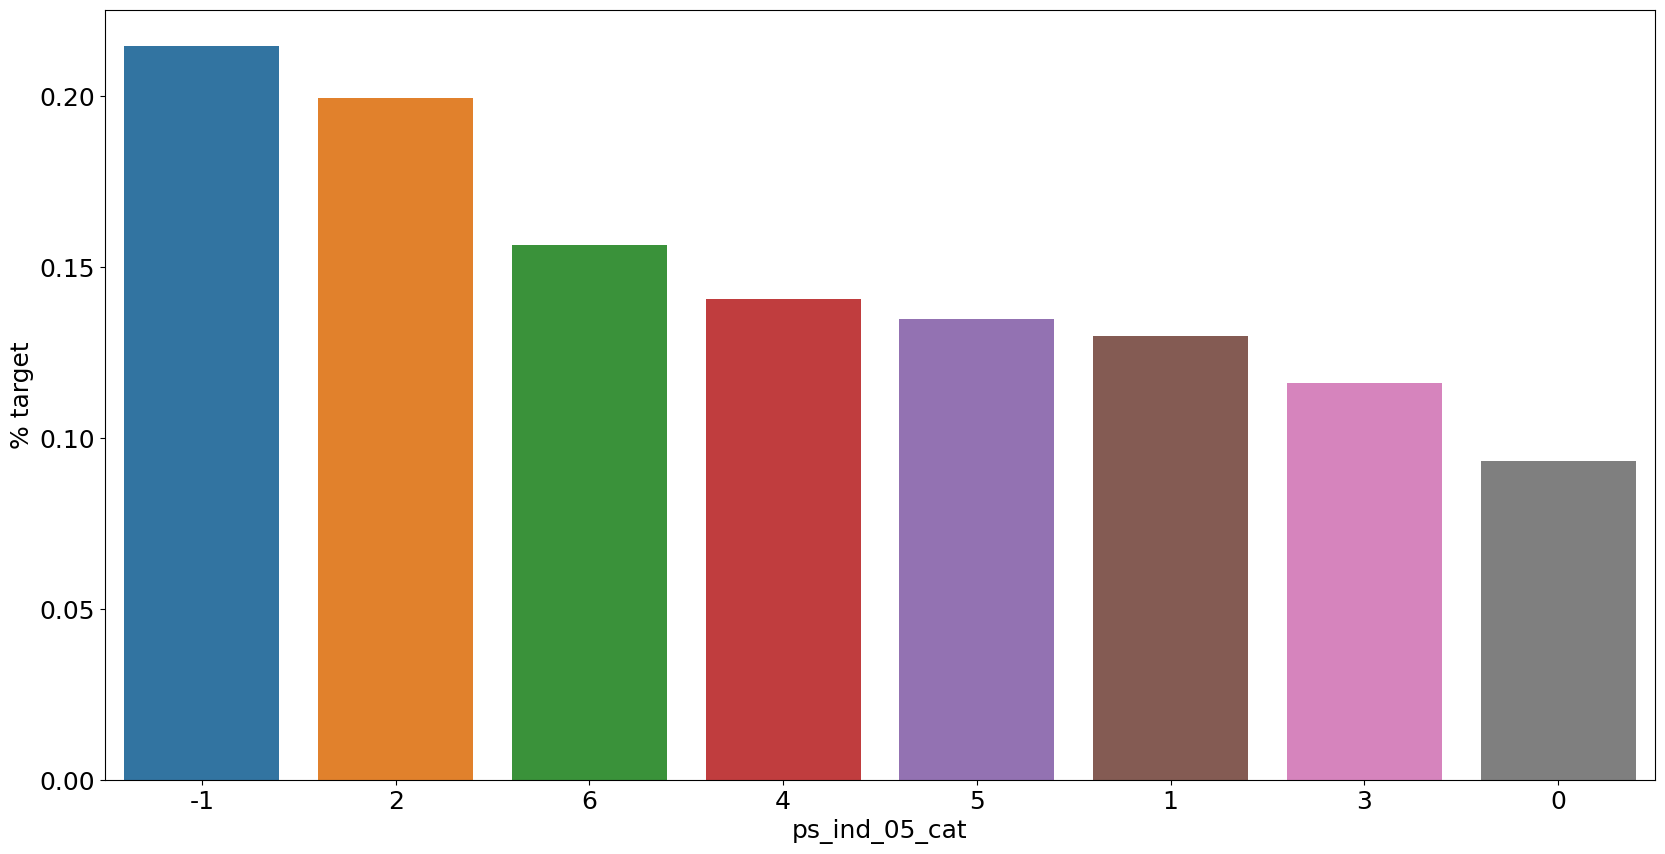

<Figure size 640x480 with 0 Axes>

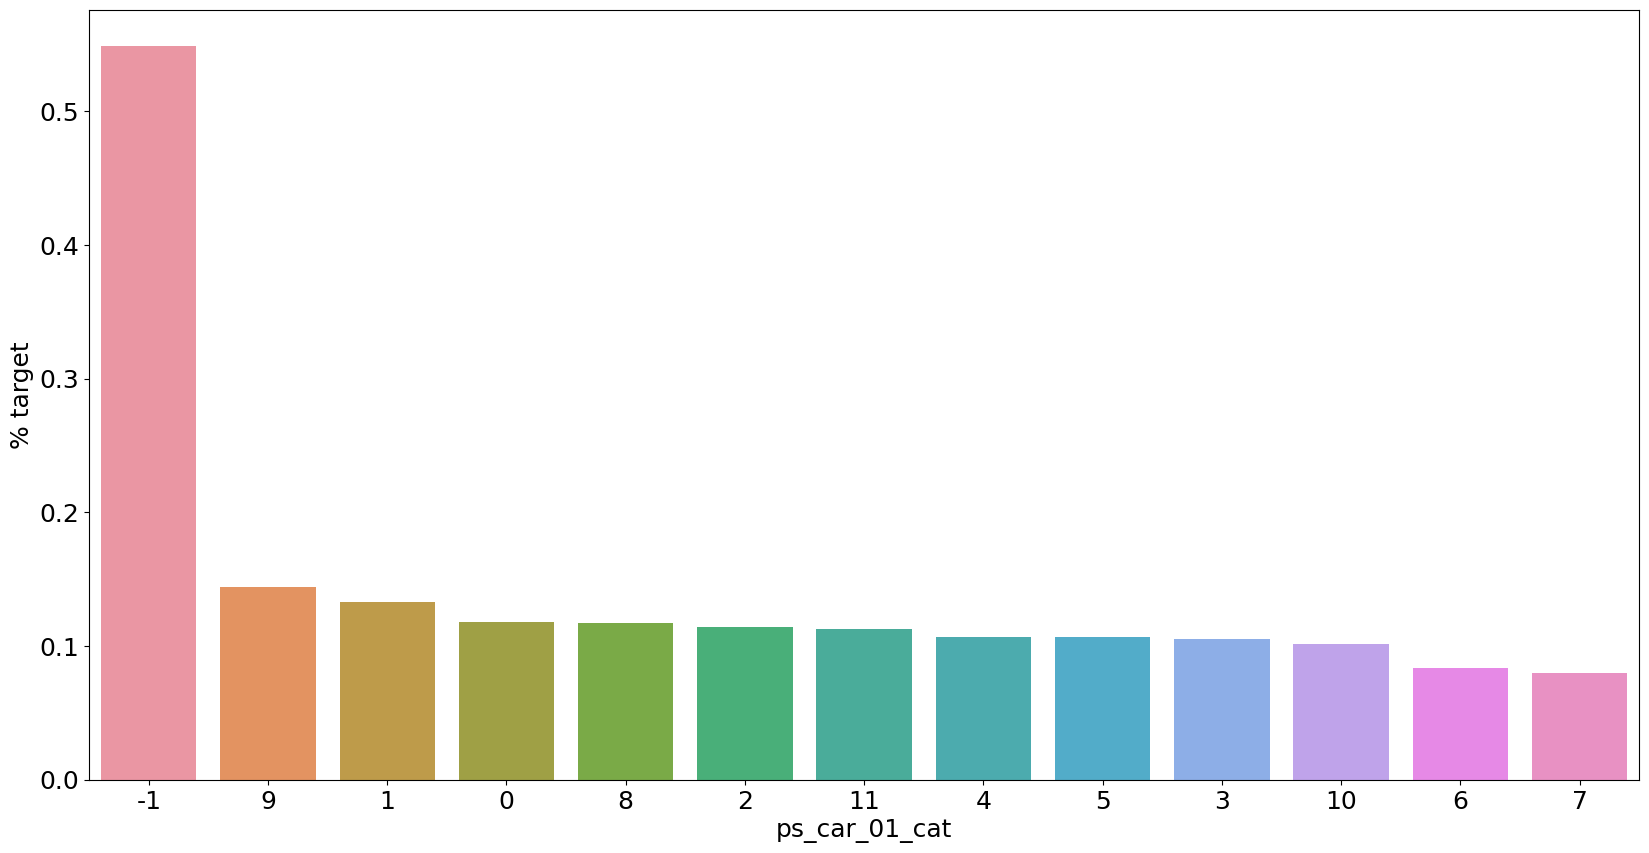

<Figure size 640x480 with 0 Axes>

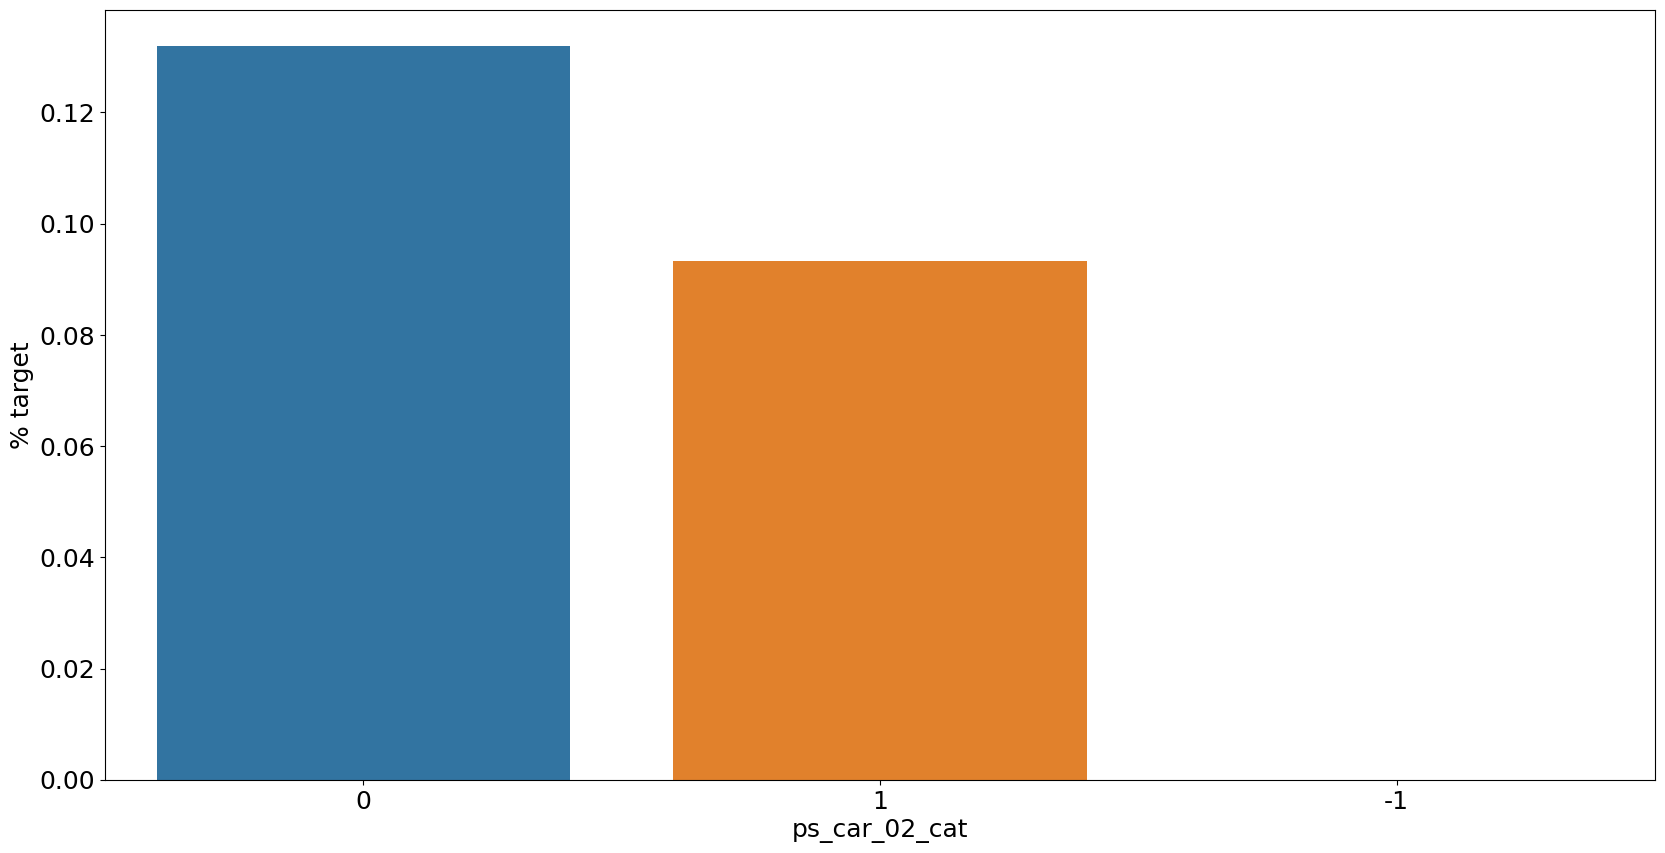

<Figure size 640x480 with 0 Axes>

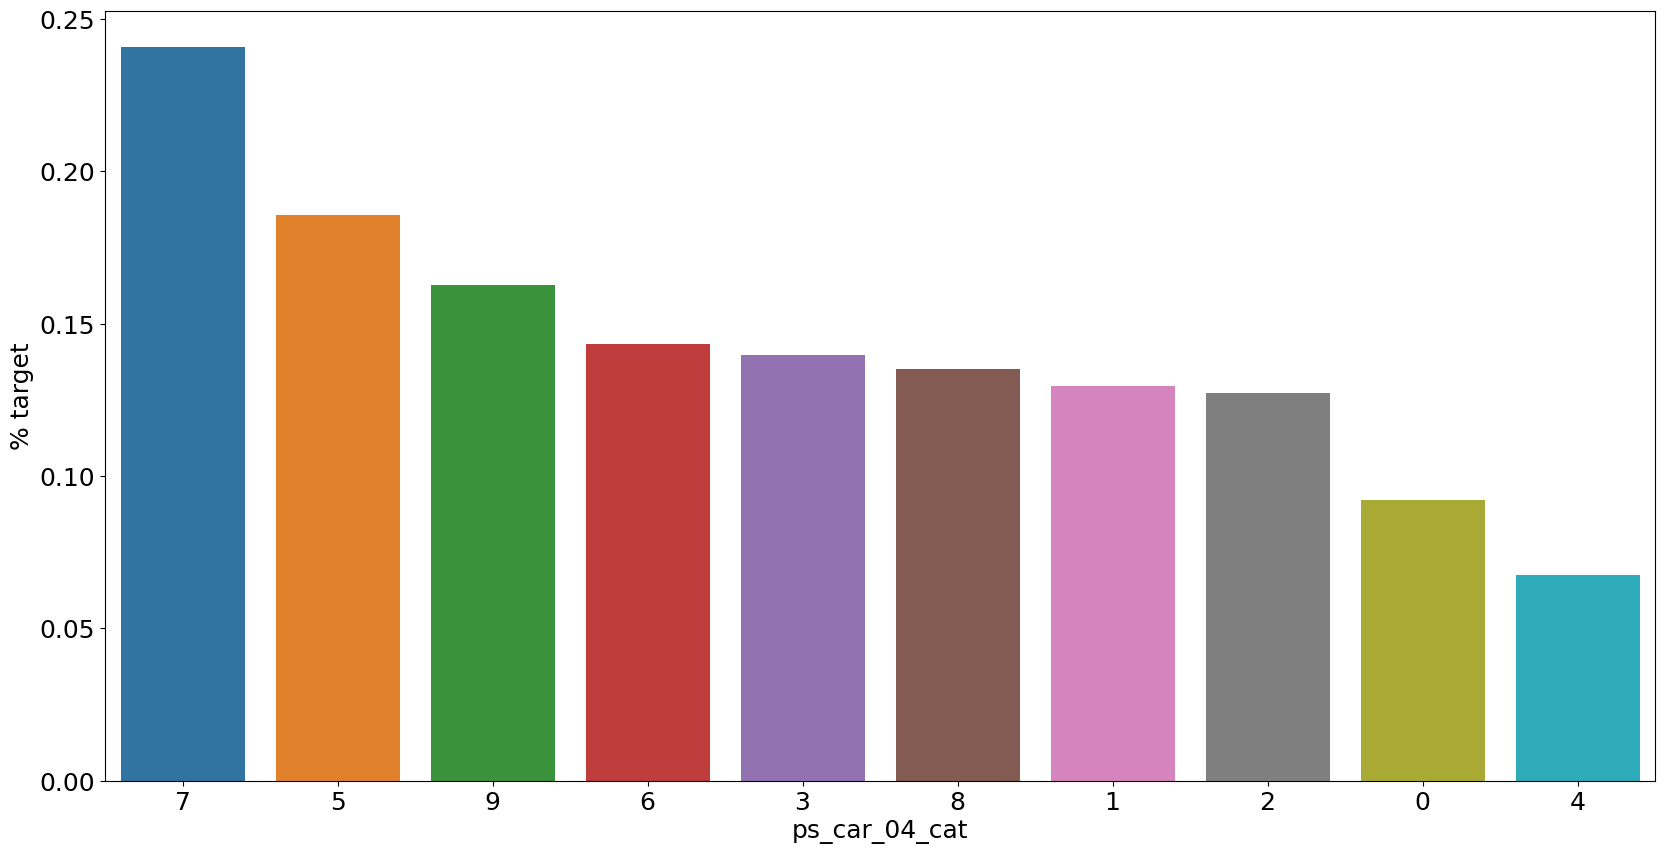

<Figure size 640x480 with 0 Axes>

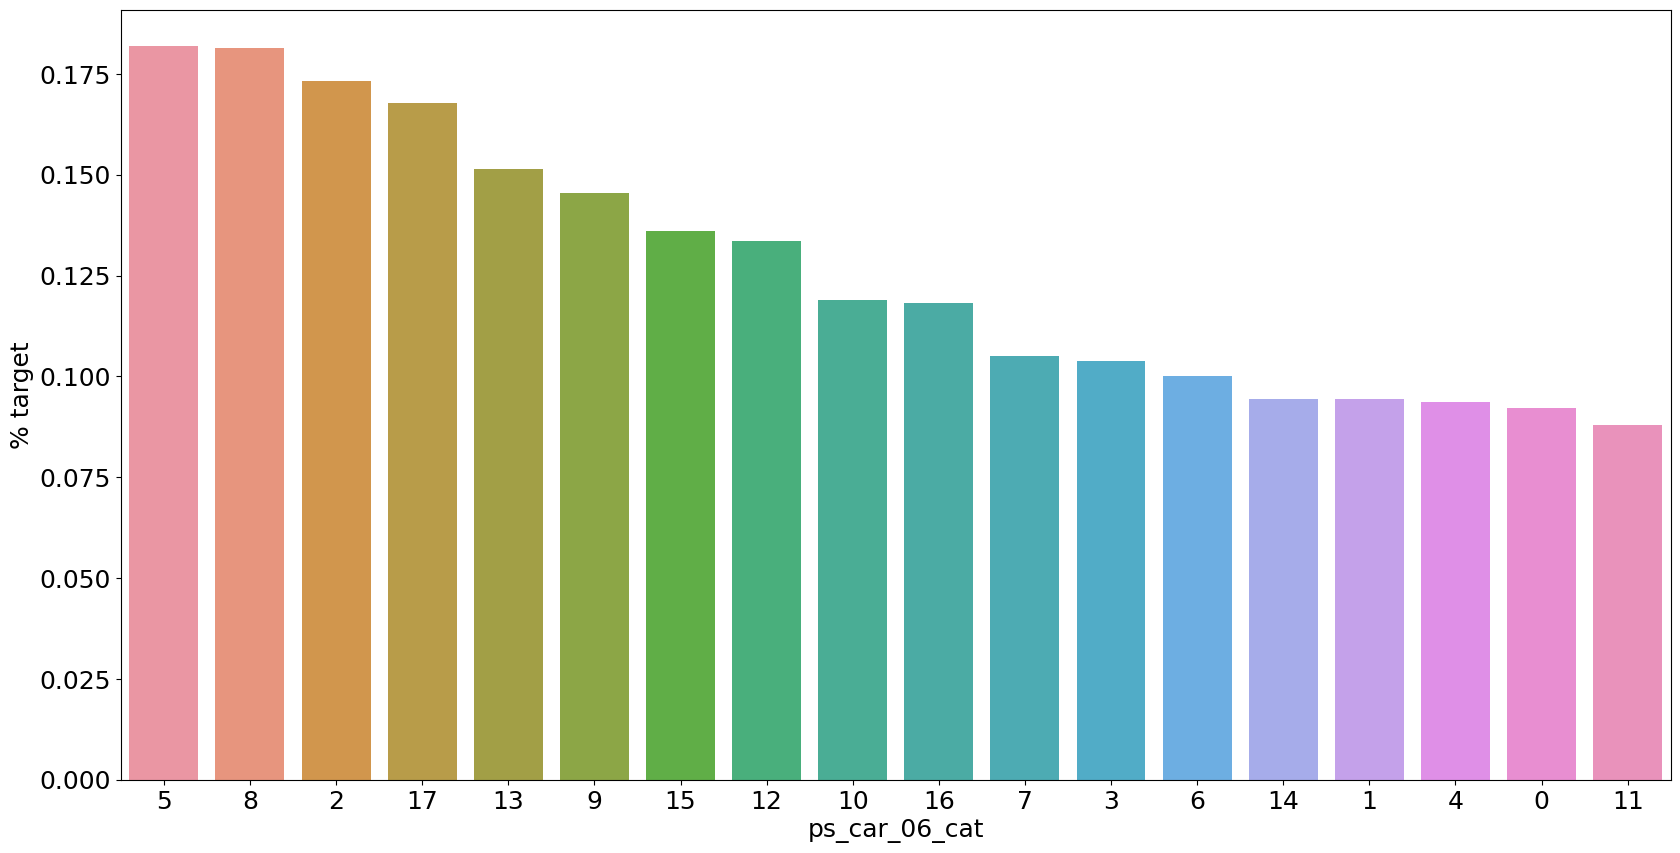

<Figure size 640x480 with 0 Axes>

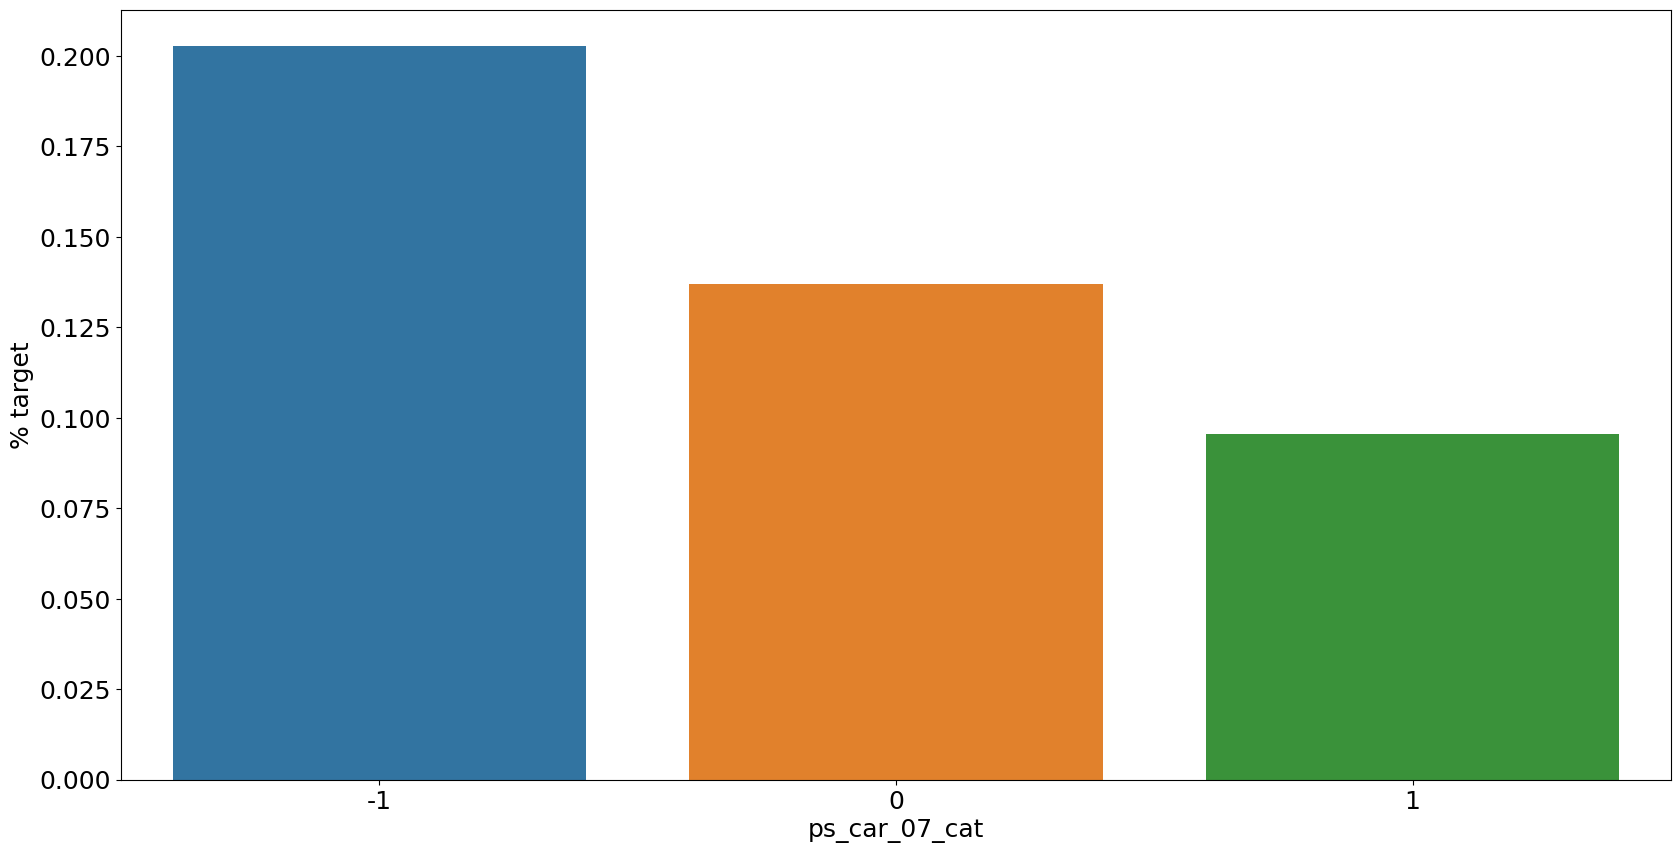

<Figure size 640x480 with 0 Axes>

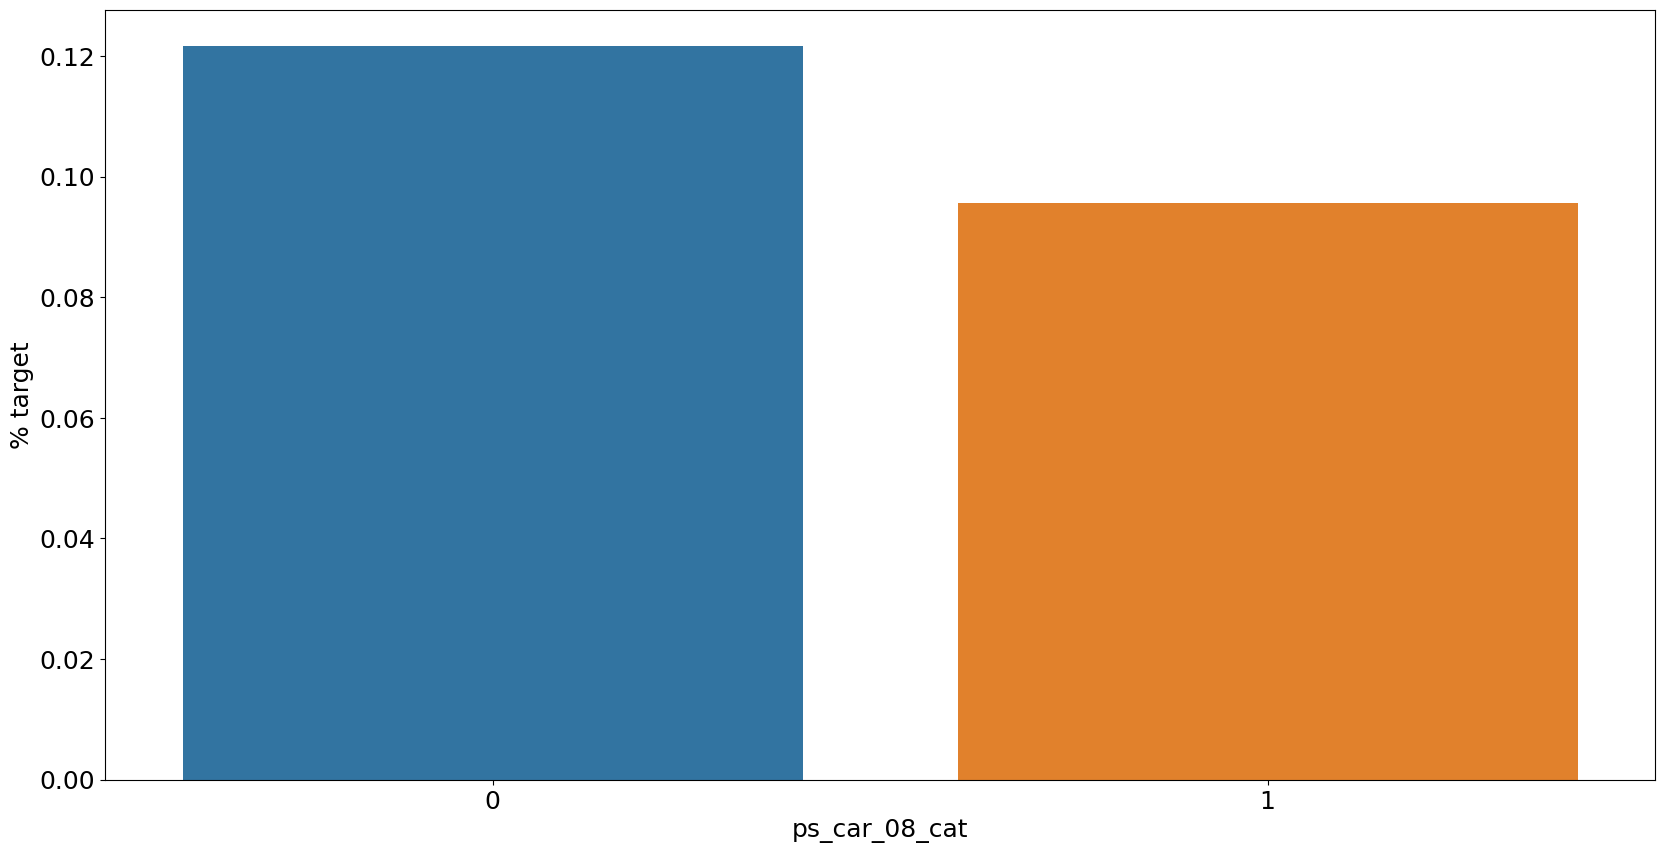

<Figure size 640x480 with 0 Axes>

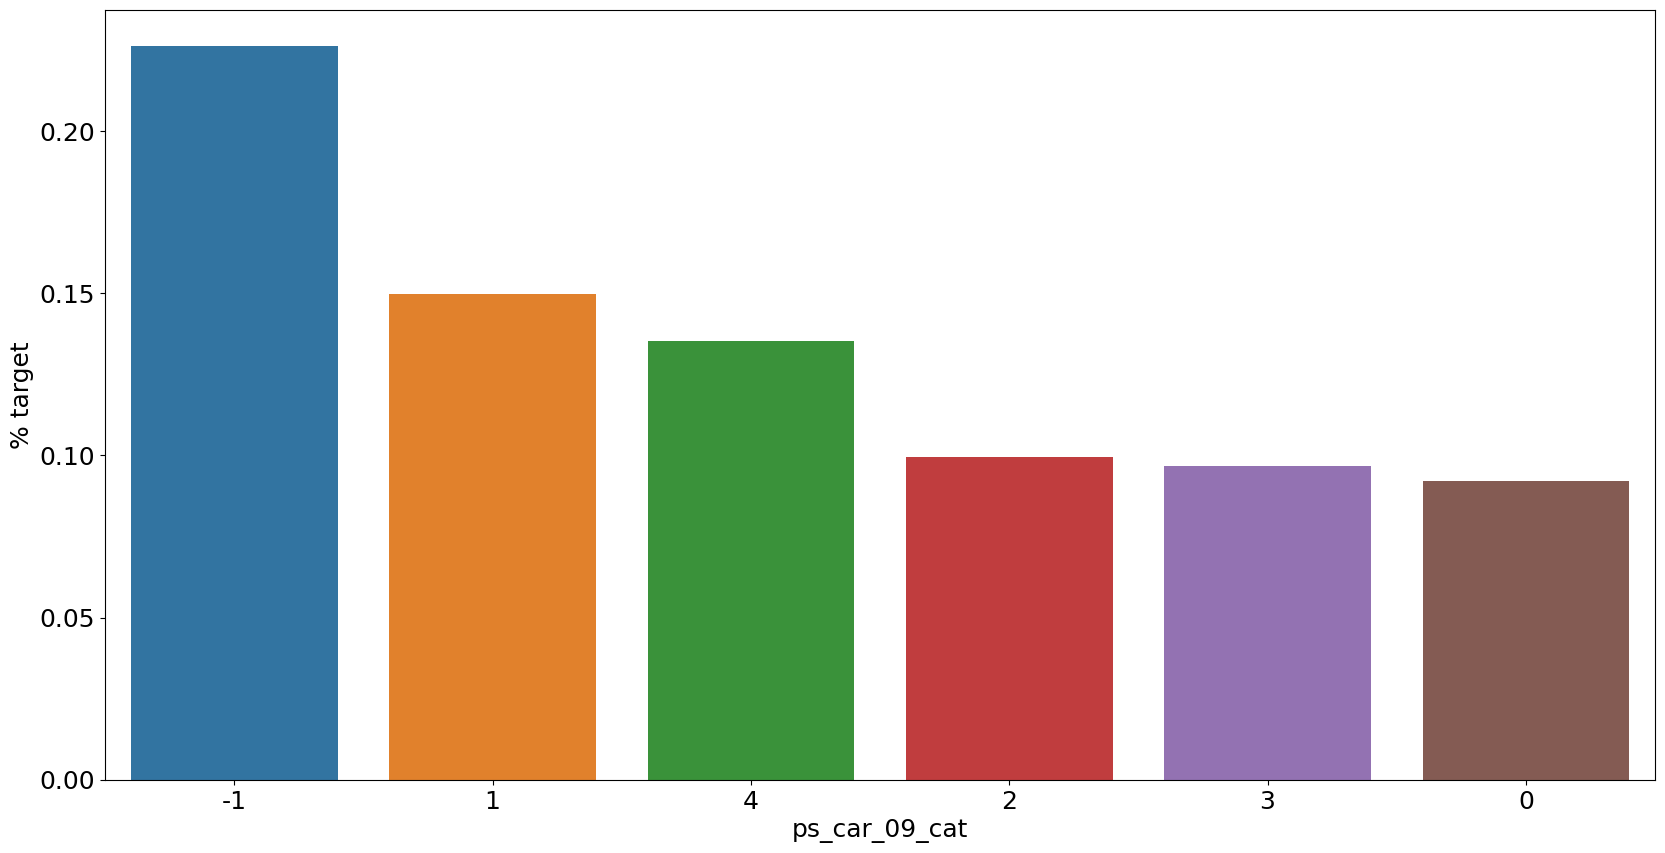

<Figure size 640x480 with 0 Axes>

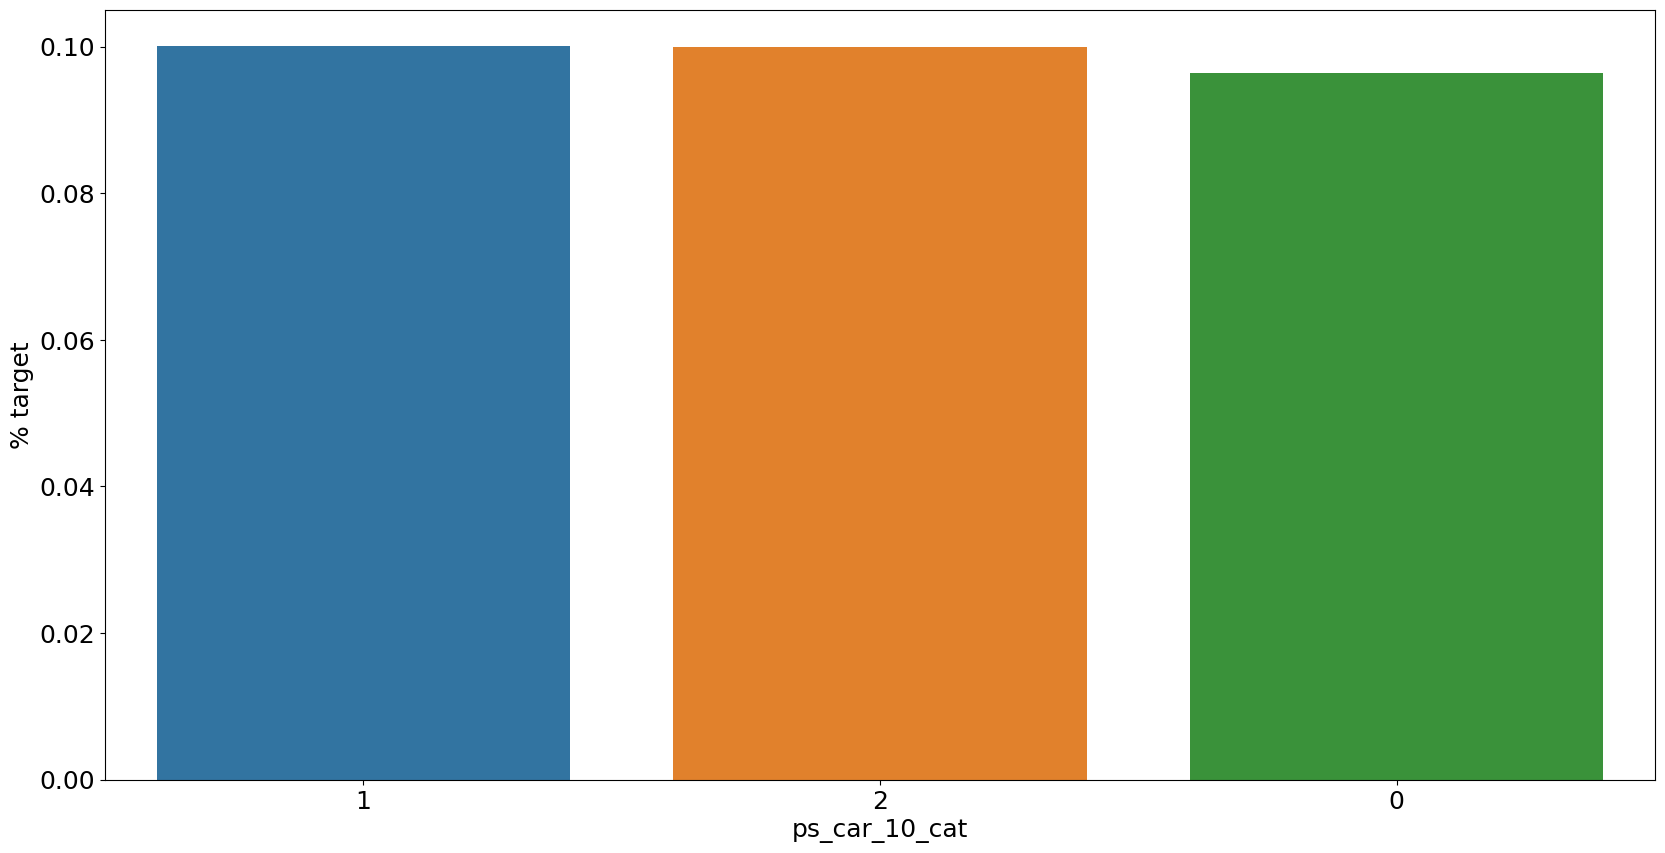

In [24]:
v = meta[(meta.level=='nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of targt = 1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on target mean
    
    sns.barplot(ax=ax, x=f, y='target', data = cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

* 결측값이 있는 고객은 보험 청구를 요청할 확률이 훨씬 높은 것으로 보인다.(낮은 경우도 있음) 이를 최빈값으로 교체하는 등 방법이 다양하게 있을 것이다.

### Interval variables
각각 Interval variables의 상관계를 알아보자. 아래 코드는 an exmaple by Michael Waskom에 기반하여 작성했다.

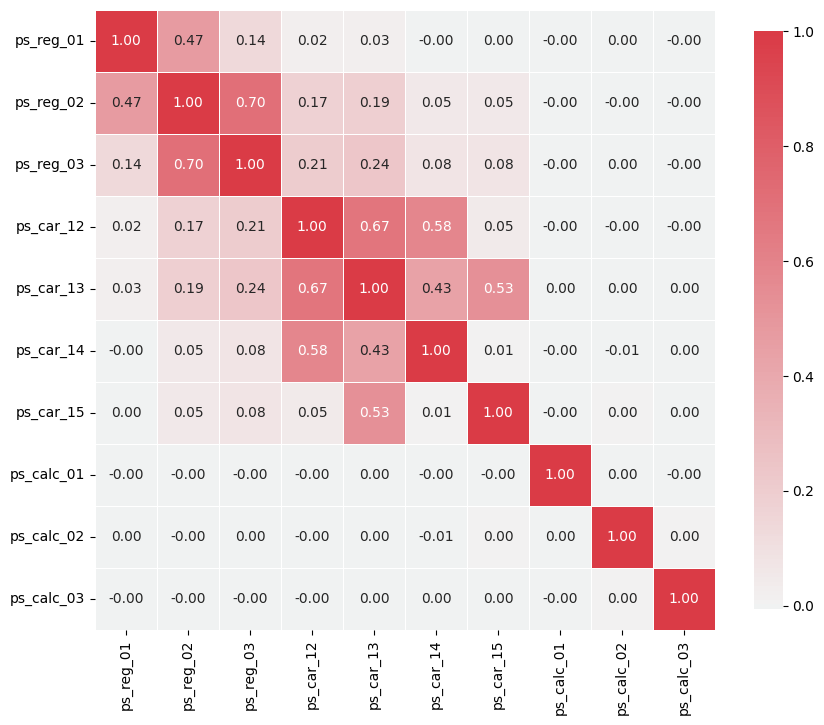

In [25]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.75})
    plt.show()
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

* 높은 상관관계를 가진 변수들:
* ps_reg_02 & ps_reg_03(0.70)
* ps_car_12 & ps_car_13(0.67)
* ps_car_12 & ps_car_14(0.58)
* ps_car_13 & ps_car_15(0.53)

In [26]:
# 빠른 프로세싱을 위해 sample 추출 / frac=0.1 : fraction 10% 
s = train.sample(frac=0.1)

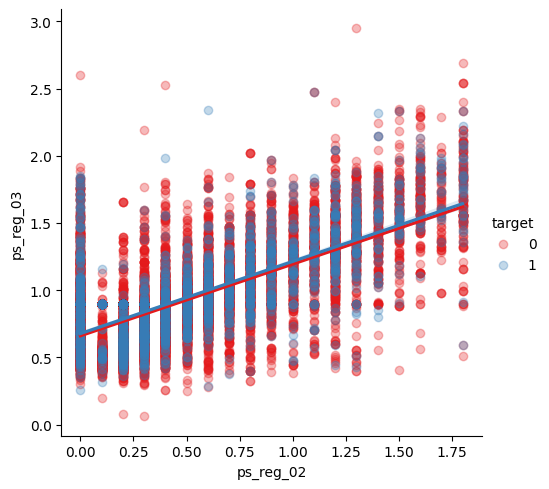

In [27]:
# 회귀 직선을 확인하면 피쳐들이 선형 관계가 있다는 것을 알 수 있고, hue로 회귀 직선이 target 0,1일때를 본다.
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})

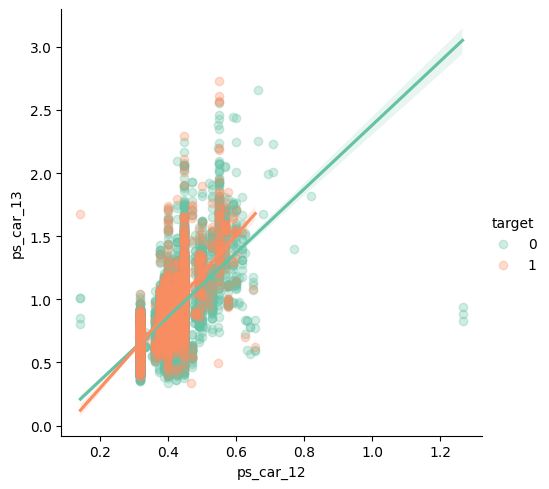

In [28]:
# alpha : 불투명도
sns.lmplot(x='ps_car_12', y= 'ps_car_13', data=s, hue='target', palette='Set2', scatter_kws={'alpha':0.3})

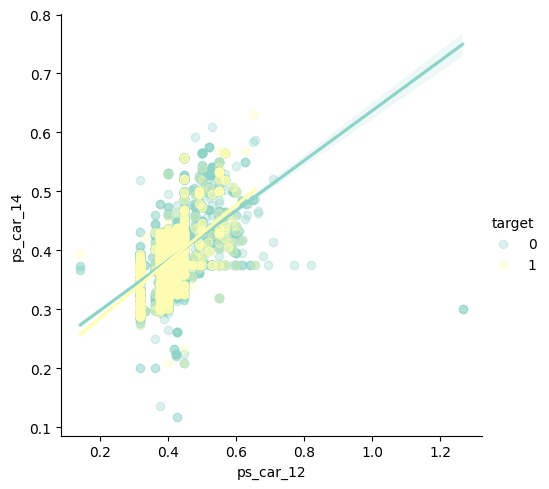

In [29]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set3', scatter_kws={'alpha':0.3})

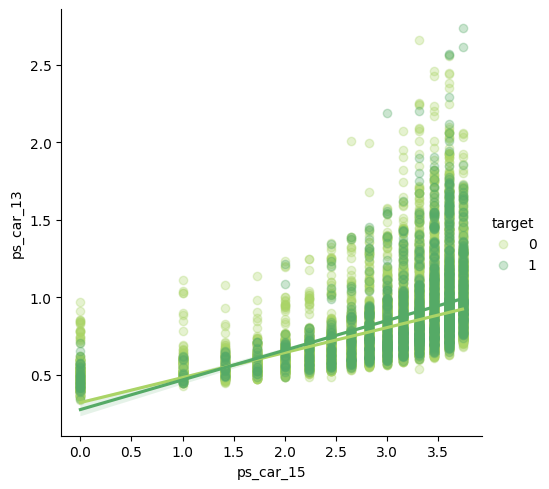

In [30]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='summer_r', scatter_kws={'alpha':0.3})

### Checking the Correlations between Orinal variables
아래 heatmap을 보면 서수형 변수들에선 상관관계가 높게 나타나지 않는다. 하지만 우리는 목표값별로 그룹화할 때 분포가 어떻게 되는지 알아볼수 있다.

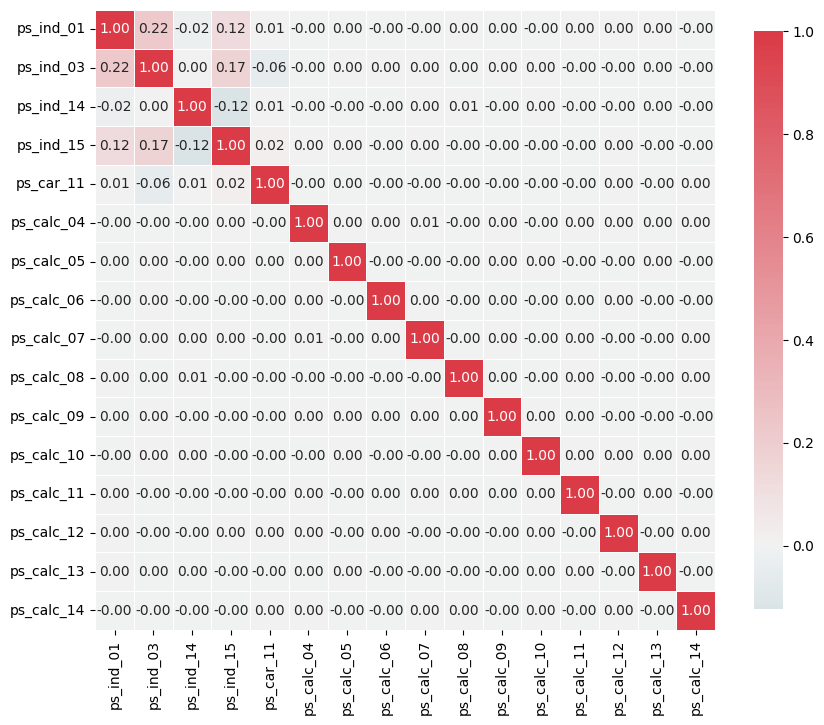

In [31]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## Feature engineering

### Creating dummy variables
카테고리형 변수에서 1과 2는 값이 2배임을 의미하진 않는다. 그러므로 더미형 변수를 만들어줘야 한다. 첫번째 더미 변수를 삭제하는 이유는 원래 변수의 범주에 대해 생성된 다른 다른 더미 변수에서 파생될수 있기 때문이다.

In [32]:
v = meta[(meta.level=='nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


* drop_first 에 대한 추가 설명

타이타닉 예제에서 예를 들면 Pclass 1, 2, 3이 있었고, 이에 더미 변수를 생성하면 Pclass_1, Pclass_2, Pclass_3이 나온다. 여기서 drop_first를 하면 Pclass_2, Pclass_3만 나온다. 이렇게 해도 두 값이 0이라면 Pclass가 1임을 알수 있기 때문이다.

### Creating interaction variables

In [33]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True)
print(f'교호작용 전에 train 세트에 있는 변수의 갯수: {train.shape[1]}')
train = pd.concat([train, interactions], axis=1)
print('After dummification we have {} variables in train'.format(train.shape[1]))

교호작용 전에 train 세트에 있는 변수의 갯수: 109
After dummification we have 164 variables in train


## Feature Selection

### Remooving Features with low or zero variance

분산이 없거나 매우 낮은 피쳐럴 제거할 수 있는데, sklearn의 VarianceThreshold를 이용해서 제거할 수 있다. 기본적으로 분산이 0인 피쳐를 제거하는데 이전 단계에서 분산이 0인 변수가 없었으므로, 1% 미만인 피쳐를 제거하게 설정할 수 있다.

Vectorize는 매트릭스 구조의 데이터의 연산을 일괄적으로 처리할 수 있도록 Series, Dataframe, array 등과 같이 시퀀스 형 자료를 함수의 매개변수로 포함시킬 수 있게 하는 것을 말한다.

In [34]:
selector = VarianceThreshold(threshold = .01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


만약 분산을 바탕으로 선택하면 많은 변수가 없어질 것이다. 그러나 우리가 지금 변수를 많이 갖고 있기에 분류기가 선택하도록 하자. sklearn의 SelectFromModel 메서드를 사용하면 최상의 피쳐를 선택하게 할 수 있다. 아래에서 랜덤 포레스트를 통해 방법을 설명한다.

### Selecting Features with a Random Forest and SelectFromModel

랜덤 포레스트의 feature importances를 이용해서 선택하도록 하자. SelectFromModel로 유지할 변수의 수를 지정할 수 있고, feature importances에 대한 임계값을 수동으로 설정할 수 있다. 여기선 간단하게 상위 50%만 설정한다.

In [35]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021215
 2) ps_car_13                      0.017287
 3) ps_car_13^2                    0.017265
 4) ps_car_12 ps_car_13            0.017263
 5) ps_car_13 ps_car_14            0.017176
 6) ps_reg_03 ps_car_13            0.017119
 7) ps_car_13 ps_car_15            0.016880
 8) ps_reg_01 ps_car_13            0.016770
 9) ps_reg_03 ps_car_14            0.016245
10) ps_reg_03 ps_car_12            0.015575
11) ps_reg_03 ps_car_15            0.015159
12) ps_car_14 ps_car_15            0.015022
13) ps_car_13 ps_calc_01           0.014762
14) ps_car_13 ps_calc_03           0.014711
15) ps_reg_01 ps_reg_03            0.014698
16) ps_reg_02 ps_car_13            0.014688
17) ps_car_13 ps_calc_02           0.014688
18) ps_reg_01 ps_car_14            0.014341
19) ps_reg_03                      0.014278
20) ps_reg_03^2                    0.014236
21) ps_reg_03 ps_calc_03           0.013817
22) ps_reg_03 ps_calc_02           0.013745
23) ps_reg_03 ps_calc_01        

In [36]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print(f'Selection 전 feature 수: {X_train.shape[1]}' )
n_features = sfm.transform(X_train).shape[1]
print(f'Selection 후 feature 수: {n_features}')
selected_vars = list(feat_labels[sfm.get_support()])

Selection 전 feature 수: 162


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selection 후 feature 수: 81


In [37]:
train = train[selected_vars + ['target']]

## Feature scaling
앞서 언급한 것과 같이 train set에 standard scaling을 할 수 있고, 이는 몇몇 분류기의 성능을 향상시킬 수 있다.

In [38]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])